# Importing Libraries

In [1]:
pip install seaborn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow==2.8  # Replace with an appropriate version


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
pip install protobuf==3.20.*


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/904.2 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/904.2 kB ? eta -:--:--
   ---------------------------------------- 904.2/904.2 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.30.2
    Uninstalling protobuf-6.30.2:
      Successfully uninstalled protobuf-6.30.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop



# Displaying Images

In [3]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/C:/emotion detection/emotion final/fer2013.csv"

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Number of images for expression 'disgust' (label 1): 547


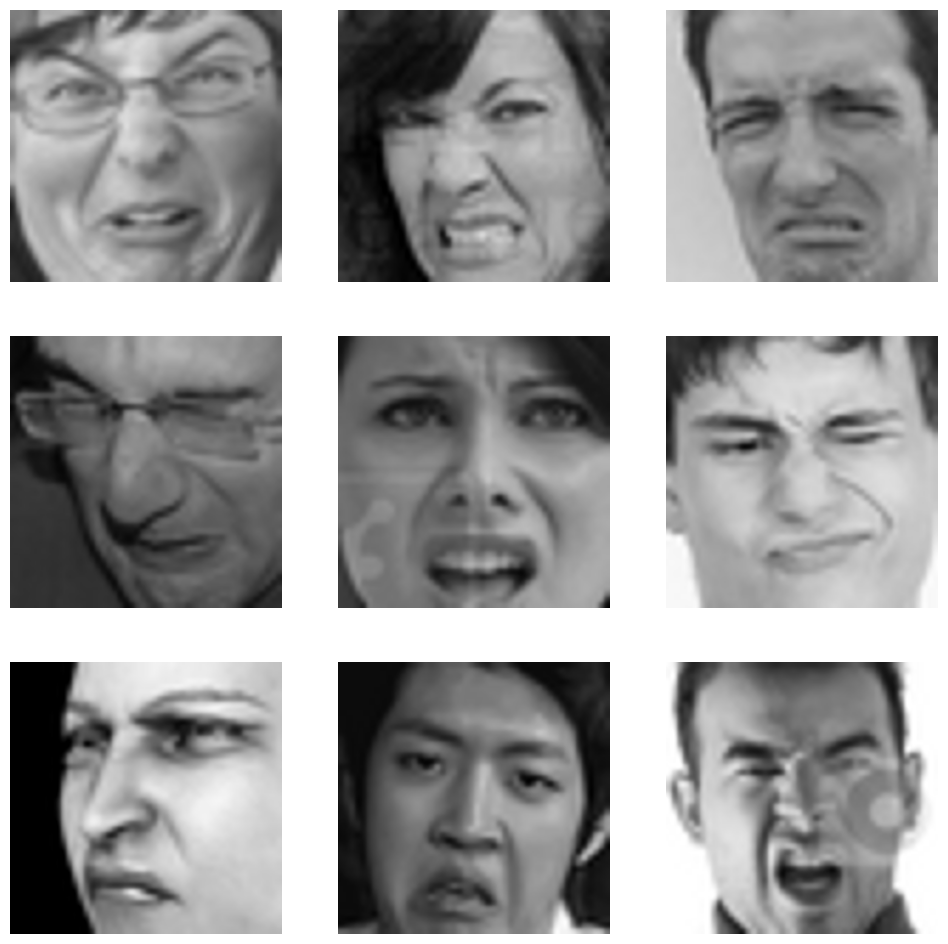

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Set folder path where your dataset is stored
folder_path = 'C:/emotion detection/emotion final'  # Replace with your actual folder path

# Set the size for resizing images
picture_size = 224  # or any size you want, typically 224 for models like VGG16, ResNet, etc.

# Load the CSV file containing emotion labels and pixel data
df = pd.read_csv('C:/emotion detection/emotion final/fer2013.csv')  # Replace with your actual path to the CSV file

# Check the first few rows to understand the structure of the data
print(df.head())

# Expression to visualize images of a specific emotion (numeric label for 'disgust' is 1)
expression_label = 1  # Numeric label for 'disgust'

# Filter the dataset to get only images of the specified expression
expression_data = df[df['emotion'] == expression_label]

# Check how many images are available for this expression
print(f"Number of images for expression 'disgust' (label {expression_label}): {len(expression_data)}")

# Create a figure to display the images
plt.figure(figsize=(12, 12))

# Loop through the first 9 images (or fewer if there aren't enough)
for i in range(min(9, len(expression_data))):  # Adjusted to display only available images
    plt.subplot(3, 3, i + 1)  # Create a subplot in a 3x3 grid
    
    # Extract the pixel data from the 'pixels' column, which is a string of space-separated pixel values
    pixels = expression_data.iloc[i]['pixels']
    
    # Convert the pixel data into a numpy array, reshape to (48, 48), and normalize
    pixels = np.array(pixels.split(), dtype='float32')  # Convert to float32
    pixels = pixels.reshape(48, 48)  # Image size is 48x48 in the original FER-2013 dataset
    
    # Convert the numpy array to a PIL image
    img = Image.fromarray(pixels)
    
    # Resize the image to the target size (picture_size)
    img_resized = img.resize((picture_size, picture_size))

    # Display the image
    plt.imshow(img_resized, cmap='gray')  # Use 'gray' for grayscale images
    plt.axis('off')  # Hide axis for better visualization

# Show the images
plt.show()


# Making Training and Validation Data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define batch size and picture size
batch_size = 32
picture_size = 48 # Update to match the input shape of the old model

# Base folder path
folder_path = 'C:/emotion detection/emotion final'

# Initialize the ImageDataGenerators
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

# Define the train and validation sets
train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, "train"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",  # Input is grayscale
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, "validation"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Model Building

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def build_cnn(input_shape=(48, 48, 1), num_classes=7):
    model = models.Sequential()

    # Conv Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))  # Corrected the typo here

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model Summary
cnn_model = build_cnn(input_shape=(48, 48, 1), num_classes=7)
cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)       

# Fitting the Model with Training and Validation Data 

In [17]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 1. Enable mixed precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# 2. Settings
picture_size = 48
batch_size = 32
num_classes = 7

# 3. ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Load datasets
train_set = train_datagen.flow_from_directory(
    'C:/emotion detection/emotion final/train',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",  # Keep grayscale if your model expects it
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_set = test_datagen.flow_from_directory(
    'C:/emotion detection/emotion final/validation',
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# 5. Generator wrapper to cast to float32
def generator(data_gen):
    while True:
        x, y = data_gen.next()
        x = x.astype(np.float32)
        y = y.astype(np.float32)
        yield x, y

# 6. Create tf.data.Dataset
train_set_tf = tf.data.Dataset.from_generator(
    lambda: generator(train_set),
    output_signature=(
        tf.TensorSpec(shape=(None, picture_size, picture_size, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
)

test_set_tf = tf.data.Dataset.from_generator(
    lambda: generator(test_set),
    output_signature=(
        tf.TensorSpec(shape=(None, picture_size, picture_size, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
)

# 7. Convert grayscale to RGB (if needed, otherwise skip this step)
def convert_grayscale_to_rgb(x, y):
    x = tf.image.grayscale_to_rgb(x)  # Converts (H, W, 1) to (H, W, 3)
    return x, y

AUTOTUNE = tf.data.AUTOTUNE

train_set_tf = train_set_tf.map(convert_grayscale_to_rgb, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)
test_set_tf = test_set_tf.map(convert_grayscale_to_rgb, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

# 8. Callbacks
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

# 9. Optimizer with mixed precision support
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# 10. Example: Building the model (ensure the input shape matches your dataset)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(picture_size, picture_size, 3)),  # Update if using RGB input
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 11. Compile the model with mixed precision
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [18]:
for x, y in train_set_tf.take(1):
    print("x shape:", x.shape)
    print("y shape:", y.shape)


x shape: (32, 48, 48, 3)
y shape: (32, 7)


In [19]:
# 12. Training the model
history = model.fit(
    train_set_tf,
    validation_data=test_set_tf,
    epochs=50,
    steps_per_epoch=len(train_set),  # Number of steps per epoch (batches per epoch)
    validation_steps=len(test_set),  # Number of validation steps (batches per validation epoch)
    callbacks=callbacks_list
)


Epoch 1/50
898/898 [==============================] - 339s 377ms/step - loss: 1.7427 - accuracy: 0.3043 - val_loss: 1.6438 - val_accuracy: 0.3681 - lr: 1.0000e-04
Epoch 2/50
898/898 [==============================] - 191s 213ms/step - loss: 1.6177 - accuracy: 0.3752 - val_loss: 1.5481 - val_accuracy: 0.4083 - lr: 1.0000e-04
Epoch 3/50
898/898 [==============================] - 21s 23ms/step - loss: 1.5614 - accuracy: 0.4032 - val_loss: 1.4878 - val_accuracy: 0.4277 - lr: 1.0000e-04
Epoch 4/50
898/898 [==============================] - 69s 77ms/step - loss: 1.5179 - accuracy: 0.4207 - val_loss: 1.4789 - val_accuracy: 0.4285 - lr: 1.0000e-04
Epoch 5/50
898/898 [==============================] - 235s 262ms/step - loss: 1.4862 - accuracy: 0.4305 - val_loss: 1.4263 - val_accuracy: 0.4586 - lr: 1.0000e-04
Epoch 6/50
898/898 [==============================] - 210s 234ms/step - loss: 1.4560 - accuracy: 0.4461 - val_loss: 1.4223 - val_accuracy: 0.4636 - lr: 1.0000e-04
Epoch 7/50
898/898 [======

In [20]:
# Save the entire model in HDF5 format
model.save('emotion_model.h5')


# Plotting Accuracy & Loss

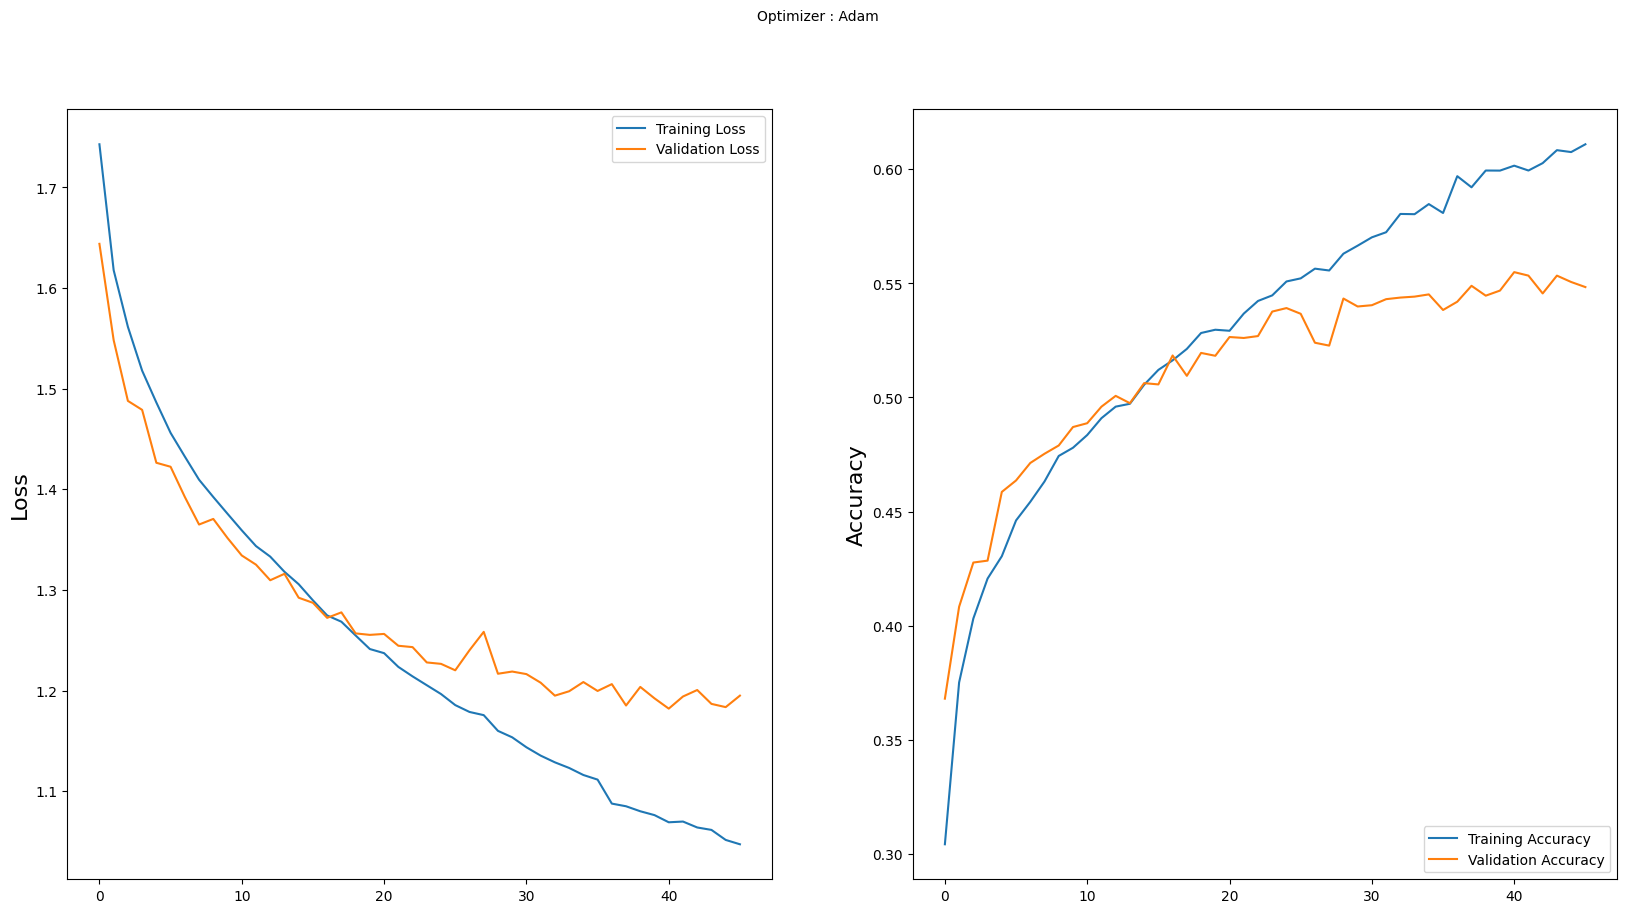

In [24]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [3]:
pip install pyqt5


^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\kabir\tf-gpu-env\tf\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\kabir\tf-gpu-env\tf\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\Users\kabir\tf-gpu-env\tf\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\Users\kabir\tf-gpu-env\tf\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\kabir\tf-gpu-env\tf\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\kabir\tf-gpu-env\tf\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\kabir\tf-gpu-env\tf\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Users\kabir\tf-gpu-env\tf\lib\ssl.p

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.9 MB 166.1 kB/s eta 0:00:39
   --- --------------

In [1]:
import sys
import cv2
import numpy as np
from PyQt5.QtWidgets import QApplication, QLabel, QMainWindow, QPushButton, QVBoxLayout, QWidget
from PyQt5.QtCore import QTimer, Qt
from PyQt5.QtGui import QImage, QPixmap, QFont, QColor
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array

class EmotionDetector(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Emotion Detector")
        self.setFixedSize(800, 600)
        self.setStyleSheet("background-color: #1e1e1e; color: #ffffff;")  # Dark background for the whole window

        self.face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        self.model = load_model('emotion_model.h5')
        self.emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

        self.label = QLabel(self)
        self.label.setAlignment(Qt.AlignCenter)
        self.label.setStyleSheet(""" 
            border-radius: 20px;
            background-color: #333333;
            border: 1px solid #444444;
            padding: 10px;
        """)

        # Define a common color for both the border and labels
        self.highlight_color = (0, 255, 255)  # Cyan for both face border and labels

        # Start camera button
        self.button_start = QPushButton("Start Camera")
        self.button_start.setFont(QFont("Segoe UI", 10, QFont.Bold))
        self.button_start.setStyleSheet("""
            QPushButton {
                background-color: #2f80ed;
                color: white;
                border: none;
                border-radius: 10px;
                padding: 10px 20px;
            }
            QPushButton:hover {
                background-color: #1c6dd0;
            }
        """)

        # Stop camera button
        self.button_stop = QPushButton("Stop Camera")
        self.button_stop.setFont(QFont("Segoe UI", 10, QFont.Bold))
        self.button_stop.setStyleSheet("""
            QPushButton {
                background-color: #eb5757;
                color: white;
                border: none;
                border-radius: 10px;
                padding: 10px 20px;
            }
            QPushButton:hover {
                background-color: #cc4c4c;
            }
        """)

        self.button_start.clicked.connect(self.start_camera)
        self.button_stop.clicked.connect(self.stop_camera)

        # Layout setup
        layout = QVBoxLayout()
        layout.addWidget(self.label)
        layout.addWidget(self.button_start)
        layout.addWidget(self.button_stop)

        container = QWidget()
        container.setLayout(layout)
        self.setCentralWidget(container)

        self.cap = None
        self.timer = QTimer()
        self.timer.timeout.connect(self.update_frame)

    def start_camera(self):
        self.cap = cv2.VideoCapture(0)
        self.timer.start(30)

    def stop_camera(self):
        self.timer.stop()
        if self.cap:
            self.cap.release()
        self.label.clear()

    def update_frame(self):
        ret, frame = self.cap.read()
        if not ret:
            return

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = self.face_classifier.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y + h, x:x + w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
            roi_rgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

            if np.sum([roi_gray]) != 0:
                roi = roi_rgb.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)
                prediction = self.model.predict(roi)[0]
                label = self.emotion_labels[prediction.argmax()]
                label_position = (x, y - 10)
                
                # Using the common highlight color for both the face border and labels
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, self.highlight_color, 2)
                cv2.rectangle(frame, (x, y), (x + w, y + h), self.highlight_color, 2)

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = QImage(frame.data, frame.shape[1], frame.shape[0], QImage.Format_RGB888)
        self.label.setPixmap(QPixmap.fromImage(img).scaled(self.label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation))

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = EmotionDetector()
    window.show()
    sys.exit(app.exec_())


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4060 Laptop GPU, compute capability 8.9
1/1 [==============================] - 0s 35ms/step


SystemExit: 0

c:\Users\kabir\tf-gpu-env\tf\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
